In [ ]:
# install necessary library
!pip install --upgrade scikit-learn==1.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 34.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
!pip3 install mlflow dagshub --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 221.3/221.3 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB

In [ ]:
# import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = r'/content/drive/MyDrive/Colab Notebooks/data/reviews_badminton/data.csv'

## Data Loading and Analysis

In [ ]:
# load dataframe
df = pd.read_csv(path)
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
# shape of dataset
df.shape

(8518, 8)

In [ ]:
# columns
df.columns

Index(['Reviewer Name', 'Review Title', 'Place of Review', 'Up Votes',
       'Down Votes', 'Month', 'Review text', 'Ratings'],
      dtype='object')

In [ ]:
# null values
df.isnull().sum().sort_values(ascending=False)

Month              465
Place of Review     50
Reviewer Name       10
Review Title        10
Up Votes            10
Down Votes          10
Review text          8
Ratings              0
dtype: int64

In [ ]:
# replace the null values with 'Not Specified'
df = df.fillna('Not Specified')

In [ ]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8518 entries, 0 to 8517
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Reviewer Name    8518 non-null   object
 1   Review Title     8518 non-null   object
 2   Place of Review  8518 non-null   object
 3   Up Votes         8518 non-null   object
 4   Down Votes       8518 non-null   object
 5   Month            8518 non-null   object
 6   Review text      8518 non-null   object
 7   Ratings          8518 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 532.5+ KB


In [ ]:
# unique values in ratings
list_of_unique_ratings = df['Ratings'].unique()
print(f"Avaliable unique ratings: {list_of_unique_ratings}")

Avaliable unique ratings: [4 1 3 5 2]


In [ ]:
# remove the values with rating 3
df=df[df['Ratings']!=3]

In [ ]:
# Create a mapping dictionary for sentiment labels
sentiment_mapping = {
    1: 'Negative',
    2: 'Negative',
    4: 'Positive',
    5: 'Positive'
}

# Convert numerical values in score to sentiment labels
df['Sentiment'] =df['Ratings'].map(sentiment_mapping)

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
4,ASHIK P A,Over priced,Not Specified,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.READ MORE,5,Positive


In [ ]:
# Remove 'READ MORE' from 'Review' column
df['Review text'] = df['Review text'].str.replace('READ MORE', '')

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Sentiment
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4,Positive
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1,Negative
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1,Negative
4,ASHIK P A,Over priced,Not Specified,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1,Negative
5,Baji Sankar,Mind-blowing purchase,"Certified Buyer, Hyderabad",173.0,45.0,Oct 2018,Good quality product. Delivered on time.,5,Positive


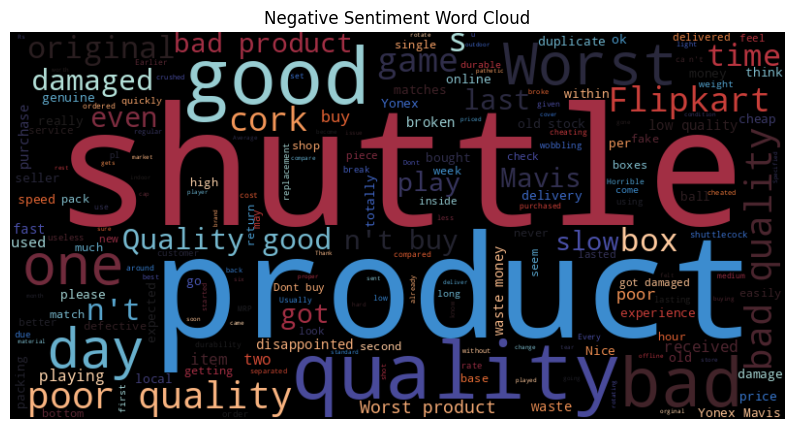

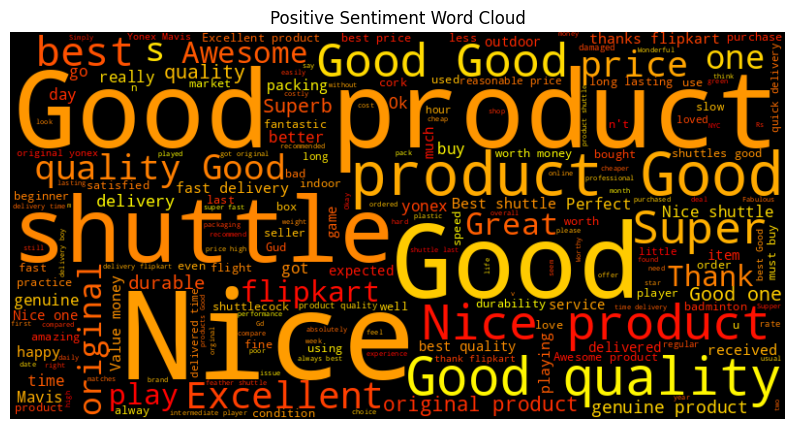

In [ ]:
# Define sentiment colors (adjust as needed)
sentiment_colors = {'Positive': 'autumn_r', 'Negative': 'icefire_r'}

def generate_sentiment_wordcloud(reviews_df, sentiment_column='Sentiment'):
  """
  Function to generate sentiment-based word cloud
  """
  stopwords_list = set(stopwords.words('english'))

  # Group reviews by sentiment and create word clouds
  for sentiment, group_df in reviews_df.groupby(sentiment_column):
    sentiment_text = ' '.join(group_df['Review text'])

    # Filter out stopwords
    filtered_text = ' '.join([word for word in word_tokenize(sentiment_text) if word not in stopwords_list])

    # Create word cloud with color based on sentiment
    wordcloud = WordCloud(width=800, height=400, background_color='black',
                          colormap=sentiment_colors[sentiment]).generate(filtered_text)

    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment.capitalize()} Sentiment Word Cloud")
    plt.show()

# Example usage
generate_sentiment_wordcloud(df)  # Replace 'copy_df' with your actual DataFrame

In [ ]:
df['Sentiment'] = df['Sentiment'].map({'Positive': 1, 'Negative': 0})

In [ ]:
df['Sentiment'].unique()

array([1, 0])

In [ ]:
# splitting input and output variables
X=df[['Review text']]
y=df['Sentiment']

## Splitting the data- train-test-split

In [ ]:
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [ ]:
lemmatizer=WordNetLemmatizer()

## Data Cleaning

In [ ]:
# Define preprocess function
def preprocess(raw_text):
    # Removing special characters and digits
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)

    # change sentence to lower case
    sentence = sentence.lower()

    # tokenize into words
    tokens =nltk.word_tokenize(sentence)

      # Lemmatize
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # remove stop words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in lemmatized_tokens if word.lower() not in stop_words]

     # Join and return
    return " ".join(filtered_tokens)

### Text Cleaning on train and test data

In [ ]:
X_train.head()

,Review text
1497,Excellent product
7148,these shuttles are as good as feather shuttle ...
6184,Good for outdoor playing.Not for indoor courts.
2666,Nice shuttles...
2561,Nice product


In [ ]:
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [ ]:
X_train = X_train['Review text'].progress_apply(lambda x: preprocess(x))
X_test = X_test['Review text'].progress_apply(lambda x: preprocess(x))

100%|██████████| 1581/1581 [00:00<00:00, 3190.86it/s]


In [ ]:
X_train.columns = ["clean_text"]
X_train.head()

1497                                    excellent product
7148    shuttle good feather shuttle flight life good ...
6184                    good outdoor playing indoor court
2666                                         nice shuttle
2561                                         nice product
Name: Review text, dtype: object

In [ ]:
X_train.shape

(6322,)

In [ ]:
X_test.columns = ["clean_text"]


In [ ]:
X_test.shape

(1581,)

In [ ]:
y_train.shape

(6322,)

In [ ]:

import dagshub
dagshub.init(repo_owner='princeabhi00985', repo_name='my-first-repo', mlflow=True)

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=a3363b8e-6775-4a1f-8068-1e0e4cd0fbaa&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=e5aeaa07d86640434c7affff77d450131433fead450e8f13d12153e94648d08a




Initialized MLflow to track repo "princeabhi00985/my-first-repo"

Repository princeabhi00985/my-first-repo initialized!

In [ ]:
# Import MLFlow and set the experiment name
import mlflow
mlflow.set_experiment("review_sentiment_prediction")

2024/03/27 14:10:52 INFO mlflow.tracking.fluent: Experiment with name 'review_sentiment_prediction' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/94f87cae55f14a7d8798263785a90e8e', creation_time=1711548652362, experiment_id='0', last_update_time=1711548652362, lifecycle_stage='active', name='review_sentiment_prediction', tags={}>

## Running the experiment

In [ ]:
# import the different classifiers from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from joblib import Memory

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## Auto Logging All Experiment Runs using MLFlow

In [ ]:
# Define a memory object to cache intermediate results
cachedir = '.cache'
memory = Memory(location=cachedir, verbose=0)



pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ], memory=memory),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ], memory=memory)
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization': [CountVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ]
}

In [ ]:
# Perform GridSearchCV for each algorithm
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

    %time grid_search.fit(X_train, y_train)

    print('Score on Test Data: ', grid_search.score(X_test, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: user 3.5 s, sys: 13.1 ms, total: 3.51 s
Wall time: 3.52 s
Score on Test Data:  0.9592792792792793
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
CPU times: user 21.1 s, sys: 75.4 ms, total: 21.2 s
Wall time: 21.5 s
Score on Test Data:  0.9517388218594748


In [ ]:
import time
import joblib
import os

In [ ]:
dev = "Pandey Abhishek Nath Roy"
best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo],
                               param_grid=param_grids[algo],
                               cv=5,
                               scoring='f1',
                               return_train_score=True,
                               verbose=1
                              )

   # Fit
    start_fit_time = time.time()
    grid_search.fit(X_train, y_train)
    end_fit_time = time.time()

    # Predict
    start_predict_time = time.time()
    y_pred = grid_search.predict(X_test)
    end_predict_time = time.time()

    # Saving the best model
    joblib.dump(grid_search.best_estimator_, f'/content/drive/MyDrive/Colab Notebooks/best_models/{algo}.pkl')
    model_size = os.path.getsize(f'/content/drive/MyDrive/Colab Notebooks/best_models/{algo}.pkl')

    # Pring Log
    print('Train Score: ', grid_search.best_score_)
    print('Test Score: ', grid_search.score(X_test, y_test))
    print("Fit Time: ", end_fit_time - start_fit_time)
    print("Predict Time: ", end_predict_time - start_predict_time)
    print("Model Size: ", model_size)

    print()

    # Start the experiment run
    with mlflow.start_run() as run:
        # Log tags with mlflow.set_tag()
        mlflow.set_tag("developer", dev)

        # Log Parameters with mlflow.log_param()
        mlflow.log_param("algorithm", algo)
        mlflow.log_param("hyperparameter_grid", param_grids[algo])
        mlflow.log_param("best_hyperparameter", grid_search.best_params_)

        # Log Metrics with mlflow.log_metric()
        mlflow.log_metric("train_score", grid_search.best_score_)
        mlflow.log_metric("test_score", grid_search.score(X_test, y_test))
        mlflow.log_metric("fit_time", end_fit_time - start_fit_time)
        mlflow.log_metric("predict_time", end_predict_time - start_predict_time)
        mlflow.log_metric("model_size", model_size)

        # Log Model using mlflow.sklearn.log_model()
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"{algo}_model")


********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Train Score:  0.9590165245277416
Test Score:  0.9592792792792793
Fit Time:  4.079205274581909
Predict Time:  0.009898900985717773
Model Size:  106791



2024/03/27 14:20:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp1t1v_rln/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.4.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 


********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Train Score:  0.9538420736586513
Test Score:  0.9524147727272727
Fit Time:  21.54693841934204
Predict Time:  0.00997161865234375
Model Size:  70809



2024/03/27 14:21:10 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpwl67agxn/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.4.0', 'cloudpickle==2.2.1']. Set logging level to DEBUG to see the full traceback. 
